In [28]:
# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Importing Dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
dataset = pd.read_csv('titanic.csv', index_col=False, sep=",", header=0)

In [10]:
# View the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Check number of rows and columns
print(dataset.shape)

(891, 12)


In [12]:
# Finding missing data
missing_data=dataset.isnull().sum().to_frame()

In [13]:
missing_data=missing_data.rename(columns={0:"Empty Cells"})

In [14]:
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


In [18]:
# View passengers with unknown age
unknown_age=dataset[dataset["Age"].isnull()]

In [22]:
unknown_age[["PassengerId","Name","Survived","Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN


In [26]:
# View passengers with missing cabin and age information
missing_age=dataset["Age"].isnull()
missing_cabin=dataset["Cabin"].isnull()
missing_age_and_cabin=dataset[missing_age&missing_cabin]
print("The number of passengers missing age and cabin information:",len(missing_age_and_cabin))

The number of passengers missing age and cabin information: 158


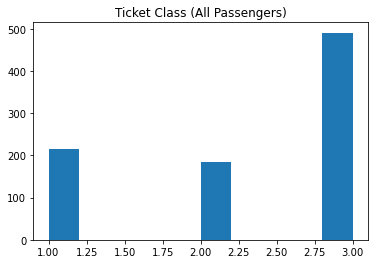

In [35]:
# Plotting histogram of missing classes
plt.hist(dataset['Pclass'])
plt.title('Ticket Class (All Passengers)')
plt.show()

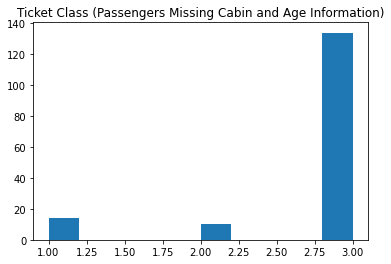

In [38]:
# Plotting histogram of missing classes
plt.hist(missing_age_and_cabin['Pclass'])
plt.title('Ticket Class (Passengers Missing Cabin and Age Information)')
plt.show()

In [40]:
# Average age
mean_age=np.mean(dataset["Age"])
print("The average age on the ship was ",mean_age,"years old")

The average age on the ship was  29.69911764705882 years old


In [41]:
# Missing age as 0
dataset["Age_2"]=dataset["Age"].fillna(0)

In [42]:
mean_age=np.mean(dataset["Age_2"])
print("The average age on the ship was",mean_age,"years old")

The average age on the ship was 23.79929292929293 years old


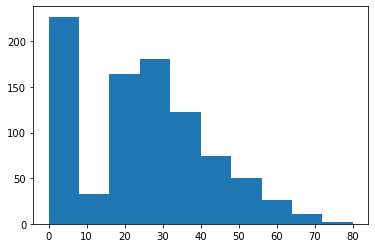

In [43]:
# Visualize distribution of missing ages
plt.hist(dataset["Age_2"])
plt.show()

In [44]:
# Handling missing data
print("The original dataset had was",dataset.shape)

The original dataset had was (891, 13)


In [46]:
clean_dataset=dataset.dropna(subset=["Embarked"])
clean_dataset=clean_dataset.reindex()
print("The shape of the clean dataset is now",clean_dataset.shape)

The shape of the clean dataset is now (889, 13)


In [47]:
# Replacing missing values with mean
mean_age=clean_dataset["Age"].mean()
print("The mean age is",mean_age)

The mean age is 29.64209269662921


In [48]:
# Replacing missing age with average age
clean_dataset["Age"].fillna(mean_age,inplace=True)

In [57]:
# Checking if dataset no longer has missing values
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:"Empty Cells"}))

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_2                  0


In [53]:
# Assign unknown to records where "cabin" is empty
clean_dataset["Cabin"].fillna("Unknown",inplace=True)

In [56]:
# Checking if the assignment of new "Unkown category was successful"
clean_dataset.isnull().sum().to_frame().rename(columns={0:"Empty Cells"})

,Empty Cells
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
